# 17. Matplotlib 퀴즈

In [1]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['axes.unicode_minus']=False

# data
import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉 연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객 수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉 연도,관객 수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


## 1. 영화 데이터를 활용하여 x축은 영화, y축은 평점인 막대그래프를 그려라.

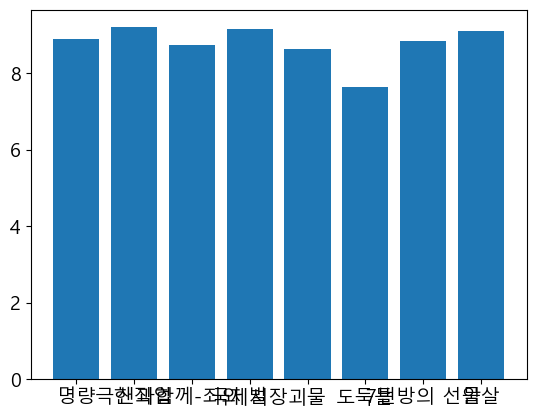

In [7]:
plt.bar(df['영화'],df['평점'])
plt.show()

## 2. 앞에서 만든 막대그래프의 세부사항을 적용해라.
* 제목 : 국내 top8 영화 정보
* x축 label : 영화 (90도 회전)
* y축 label : 평점

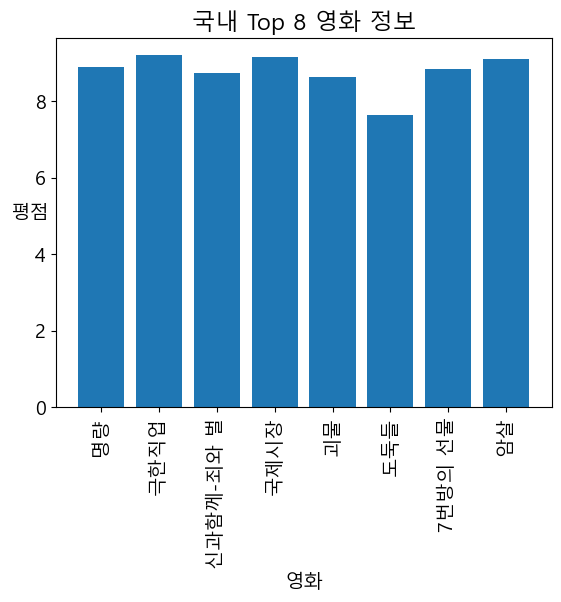

In [16]:
plt.bar(df['영화'],df['평점'])
plt.title('국내 Top 8 영화 정보')
plt.xlabel('영화')
plt.xticks(rotation=90)
plt.ylabel('평점',rotation=0)
plt.show()

## 3. 개봉 연도별 평점 변화 추이를 꺾은선 그래프로 그려라.

#### 연도별 평균 데이터를 구하는 코드
> df_group = df.groupby('개봉 연도').mean() <br/>
> df_group

In [20]:
df_group = df.groupby('개봉 연도').mean()
df_group

C:\Users\songkyu\AppData\Local\Temp\ipykernel_11984\747250585.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df.groupby('개봉 연도').mean()


,관객 수,평점
개봉 연도,,
2006,1301.0,8.62
2012,1298.0,7.64
2013,1281.0,8.83
2014,1593.5,9.02
2015,1270.0,9.10
2017,1441.0,8.73
2019,1626.0,9.20


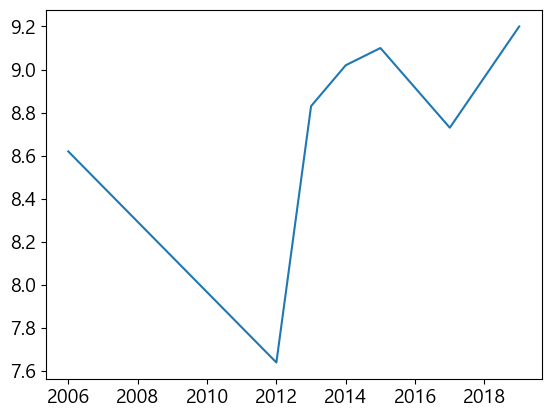

In [21]:
plt.plot(df_group.index,df_group['평점'])

## 4. 앞 그래프에 세부사항을 적용해라ㅏ.
* marker : 'o'
* x축 눈금 : 5년 단위
* y축 범위 : 최소 7, 최대 10

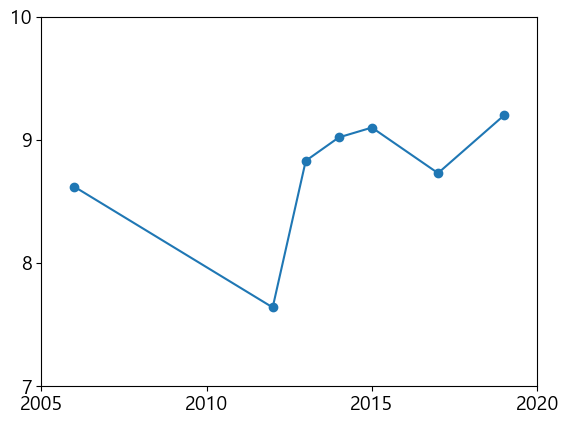

In [28]:
plt.plot(df_group.index,df_group['평점'],marker='o')
plt.xticks([2005,2010,2015,2020])
import numpy as np
plt.yticks(np.arange(7,11)) # >> plt.ylim(7,10)
plt.show()

## 5. 평점이 9점 이상인 영화의 비율을 확인할 수 있는 원 그래프를 그려라
* label : 9점 이상 / 9점 미만
* 퍼센트 : 소수점 첫째자리까지 표시
* 범례 : 그래프 우측에 표시

In [35]:
labels=['9점 미만','9점 이상']
grp = df.groupby(df['평점']>=9).count()
grp

,영화,개봉 연도,관객 수,평점
평점,,,,
False,5,5,5,5
True,3,3,3,3


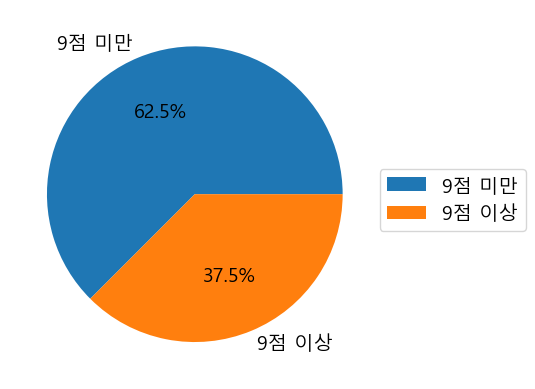

In [40]:
plt.pie(grp['영화'],labels=labels,autopct='%.1f%%')
plt.legend(loc=(1,0.4))
plt.show()